In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('placement1.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

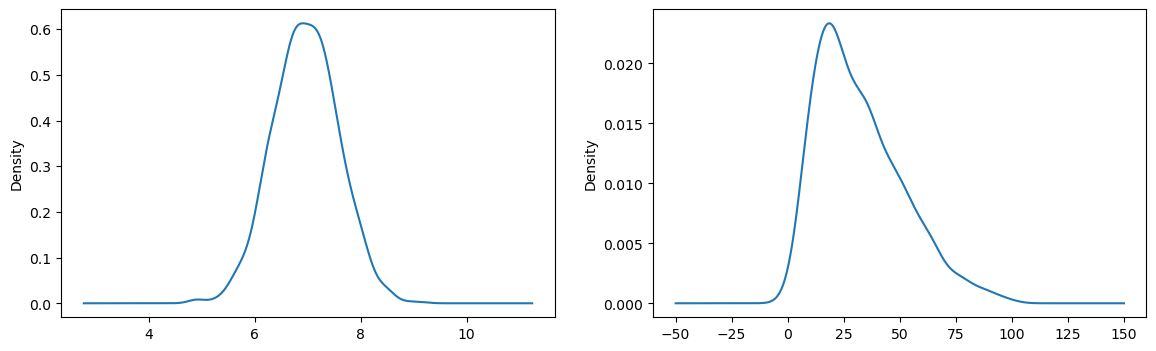

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
df['cgpa'].plot(kind = 'kde')

plt.subplot(122)
df['placement_exam_marks'].plot(kind='kde')

In [33]:
print('mean of cgpa : ', df['cgpa'].mean())
print('deviation of cgpa : ', df['cgpa'].std())
print('Min allowed value of cgpa : ', df['cgpa'].mean()-3*df['cgpa'].std())
print('Max allowed value of cgpa : ', df['cgpa'].mean()+3*df['cgpa'].std())

mean of cgpa :  6.96124
deviation of cgpa :  0.6158978751323894
Min allowed value of cgpa :  5.113546374602832
Max allowed value of cgpa :  8.808933625397168


In [34]:
# Trimming:
new_df = df[(df['cgpa']< 8.80) & (df['cgpa']>5.11)]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
559,6.61,58.0,1
107,7.32,9.0,0
661,5.72,47.0,0
619,6.81,43.0,0
333,6.74,20.0,1


In [35]:
# Approch 2
# Calculating the Z_Scores:
df['cgpa_zscores'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscores
718,7.12,36.0,1,0.257770
571,6.47,66.0,1,-0.797600
297,7.03,32.0,1,0.111642
226,6.79,21.0,1,-0.278033
66,6.67,31.0,1,-0.472871


In [36]:
df[(df['cgpa_zscores'] > 3) | (df['cgpa_zscores'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscores
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [38]:
#trimming:
new_df1 = df[(df['cgpa_zscores'] < 3) & (df['cgpa_zscores'] > -3)]
new_df1.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscores
971,6.69,18.0,1,-0.440398
206,7.50,25.0,0,0.874755
933,6.01,9.0,0,-1.544477
932,6.89,71.0,0,-0.115669
6,6.69,11.0,0,-0.440398


##### Capping:

In [39]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [40]:
import numpy as np
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [41]:
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscores
28,7.23,19.0,0,0.436371
820,6.27,16.0,0,-1.122329
825,6.30,23.0,0,-1.073620
801,6.31,14.0,0,-1.057383
882,7.25,35.0,1,0.468844


In [43]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64